# Human Resources Study

## Data visualization techniques, Exploratory Data Analysis

### About the data

The CSV revolves around a fictitious company and the core data set contains : **names**, **DOBs**, **age**, **gender**, **marital status**, **date of hire**, **reasons for termination**, **department**, whether they are **active or terminated**, **position title**, **pay rate**, **manager name**, **performance score**, **absences**, **most recent performance review date**, and **employee engagement score**.

Many points of interest can be explored through all these variables. Because grasping relevant information is the key to set up a good management, it is important for companies to study this kind of dataset and sometimes when it's needed, make new decisions.
Thus, to help our company to evolve, a lot of questions can be addressed thanks to data analysis :
- Is the performance score unequal between different areas of the company ?
- Is there any relationship between who a person works for and their performance score ?
- What is the overall diversity profile of the organization ?
- What are our best recruiting sources if we want to ensure a diverse organization ?
- Are there areas of the company where pay is not equitable ?
- Can we predict who is going to terminate and who isn't ? What level of accuracy can we achieve on this ?
- Which profiles tend to cumulate absences or to have a poor satisfaction working in the company ?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, let's import the csv dataset.

In [18]:
df = pd.read_csv('HRDataset_v14.csv')

It's also important to check the datatype of all our variables, how many observations we have and whether or not there are missing values. Here, no imputation will be needed.

In [176]:
df[df['ManagerID']==8.]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [162]:
# Check unique values for each fields except a few ones not so relevant
for c in df.columns:
  if df[c].dtype == object and (c not in ('Employee_Name', 'DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date', 'ManagerName')):
    print(c, df[c].unique())

Position ['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' 'CIO']
State ['MA' 'TX' 'CT' 'VA' 'VT' 'AL' 'WA' 'CA' 'OH' 'IN' 'TN' 'NH' 'RI' 'PA'
 'CO' 'NY' 'UT' 'GA' 'FL' 'NC' 'KY' 'ID' 'NV' 'MT' 'OR' 'ND' 'AZ' 'ME']
Sex ['M ' 'F']
MaritalDesc ['Single' 'Married' 'Divorced' 'Widowed' 'Separated']
CitizenDesc ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']
HispanicLatino ['No' 'Yes' 'no' 'yes']
RaceDesc ['White'

In [ ]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Exploratory Data Analysis

### *Is the performance score unequal between different areas of the company ? Can we detect any relationship between who a person works for and their performance score ?*

First, let's remind what are the unique values in PerformanceScore feature :

In [ ]:
df['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

How is PerformanceScore distributed in the dataset ?

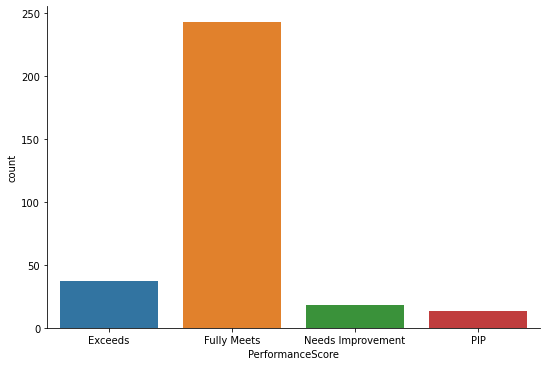

In [ ]:
sns.catplot(x='PerformanceScore', data=df, kind="count",height=5, aspect=1.5)

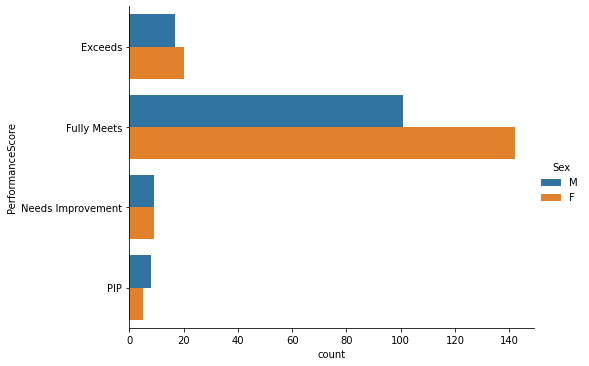

In [ ]:
sns.catplot(y='PerformanceScore', hue='Sex', data=df, kind="count", height=5, aspect=1.5)

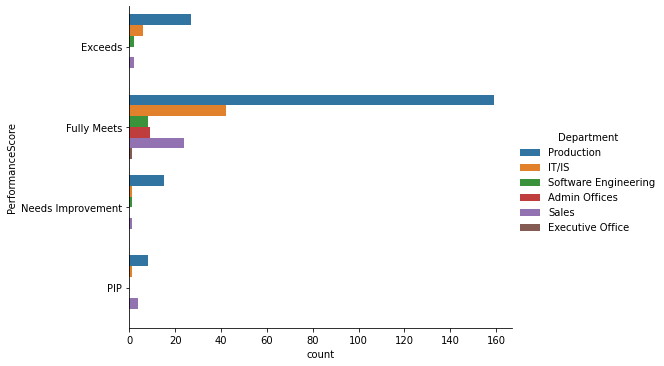

In [ ]:
sns.catplot(y='PerformanceScore', hue='Department', data=df, kind="count", height=5, aspect=1.5)

In [73]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [93]:
perfs = ['Exceeds', 'Needs Improvement', 'PIP', 'Fully Meets']
dps = ['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Executive Office', 'Sales']
palette1 ={"IT/IS": "C0", "Production       ": "C1", "Software Engineering": "C2", "Admin Offices":"C3", "Sales": "C4", "Executive Office":"C5"}
palette2 ={"Exceeds": "C0", "Needs Improvement": "C1", "PIP": "C2", "Fully Meets":"C3"}

The histogram below allows us to see the conditional probability of Department given Perfomance Score. It's a way to grasp the overall performance of the company but knowing the fact the production department is much bigger than other departments, we can do better taking the performance score given the department.

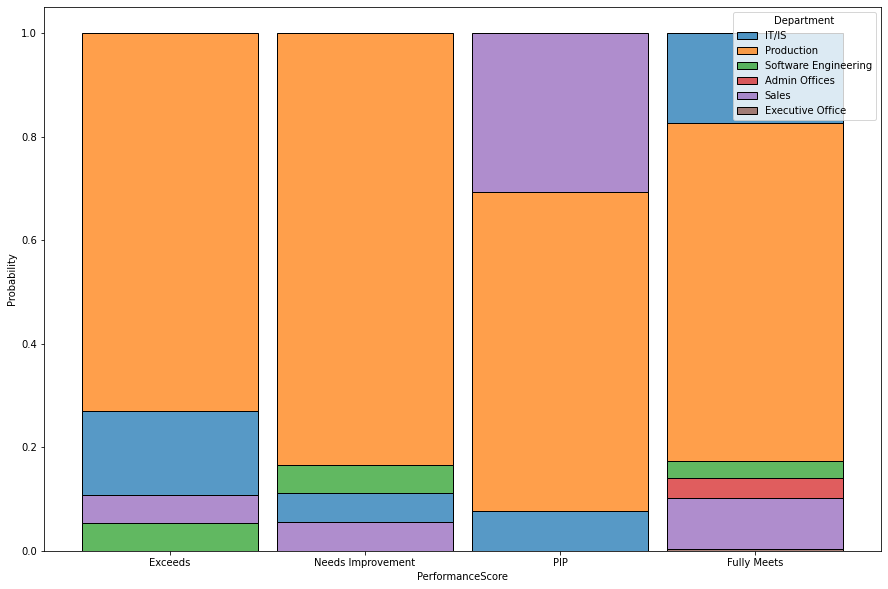

In [89]:
plt.figure(figsize=(15, 10))
for ps in perfs:
  sns.histplot(x='PerformanceScore', hue='Department', multiple='stack', shrink=.9, stat='probability',palette=palette1, data=df[df['PerformanceScore']==ps])

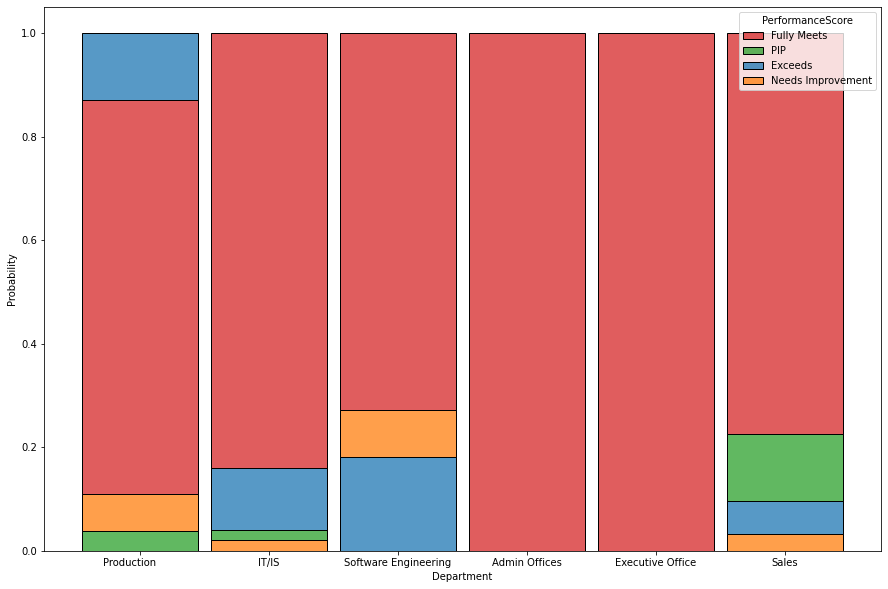

In [95]:
plt.figure(figsize=(15, 10))
for dp in dps:
  sns.histplot(x='Department', hue='PerformanceScore', multiple='stack', shrink=.9, stat='probability',palette=palette2, data=df[df['Department']==dp])

The sales department needs to be watched since it's the department which requires the most performance improvement plan (PIP). These have been set to address failures to meet specific job goals or to ameliorate behavior-related concerns. 

How many managers are there in the company ?

In [ ]:
print(len(df['ManagerName'].unique()), "unique managers are currently working in the company :", df['ManagerName'].unique())

21 unique managers are currently working in the company : ['Michael Albert' 'Simon Roup' 'Kissy Sullivan' 'Elijiah Gray'
 'Webster Butler' 'Amy Dunn' 'Alex Sweetwater' 'Ketsia Liebig'
 'Brannon Miller' 'Peter Monroe' 'David Stanley' 'Kelley Spirea'
 'Brandon R. LeBlanc' 'Janet King' 'John Smith' 'Jennifer Zamora'
 'Lynn Daneault' 'Eric Dougall' 'Debra Houlihan' 'Brian Champaigne'
 'Board of Directors']


As PerformanceScore is a categorical and ordinal feature, it is a good practice for machine learning purpose to encode it using LabelEncoder. Sklearn library contains a preprocessing method called LabelEncoder to do so but we can also do it manually to decide which numerical value we assign to each category. Later, we'll use the replace method to do the encoding. But for the moment, we can keep it like it is to perform the plotting.

In [230]:
df_copy = df.copy()
#df_copy['PerformanceScore'].replace({'Exceeds':3, 'Fully Meets':2, 'Needs Improvement':1, 'PIP':0}, inplace=True)

# convert the float ManagerID field to string and remove the .0 at the end of each value
df_copy['ManagerID'] = df['ManagerID'].astype(str)
df_copy['ManagerID'] = df_copy['ManagerID'].apply(lambda x : x.split('.')[0])

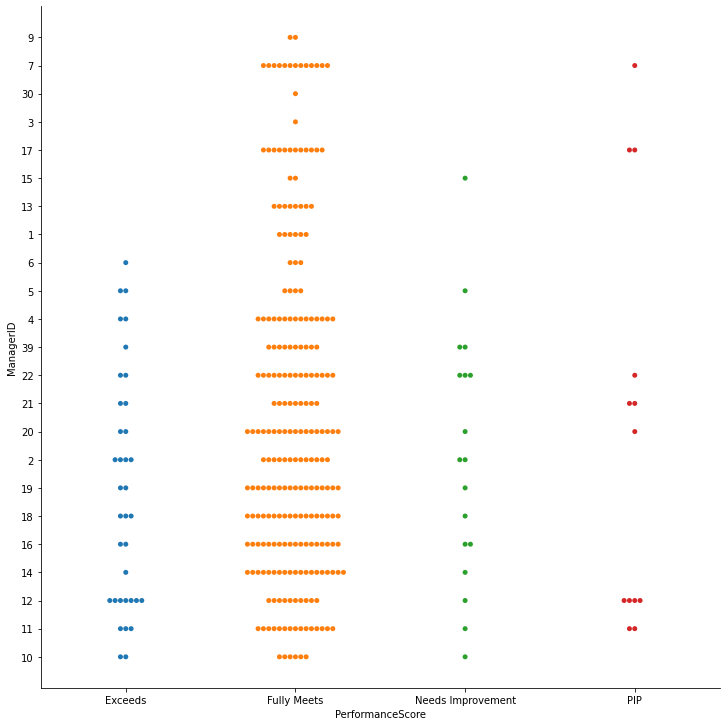

In [229]:
sns.catplot(y='ManagerID', x='PerformanceScore', kind='swarm', data=df_copy[df_copy['ManagerID']!='nan'], height=10, aspect=1)

In [ ]:
# Simple method to see performance results for each manager through a dataframe
df_copy.groupby('ManagerID')['PerformanceScore'].value_counts()

ManagerID  PerformanceScore
1.0        2                    6
2.0        2                   13
           3                    4
           1                    2
3.0        2                    1
4.0        2                   15
           3                    2
5.0        2                    4
           3                    2
           1                    1
6.0        2                    3
           3                    1
7.0        2                   13
           0                    1
9.0        2                    2
10.0       2                    6
           3                    2
           1                    1
11.0       2                   15
           3                    3
           0                    2
           1                    1
12.0       2                   10
           3                    7
           0                    4
           1                    1
13.0       2                    8
14.0       2                   19
           1        

In [205]:
#df_copy = df.copy()
#df_copy['ManagerID'] = df['ManagerID'].astype(str)
#df_copy['ManagerID'] = df_copy['ManagerID'].apply(lambda x : x.split('.')[0])
ids = ['30', '4', '20', '16', '39', '11', '10', '19', '12', '7', '14', '18', '3', '2', '1', '17', '5', '21', '6', '15', '13', '9', '22']

Plotting the performance scores for each individual manager is relevant to see how they perform individually :

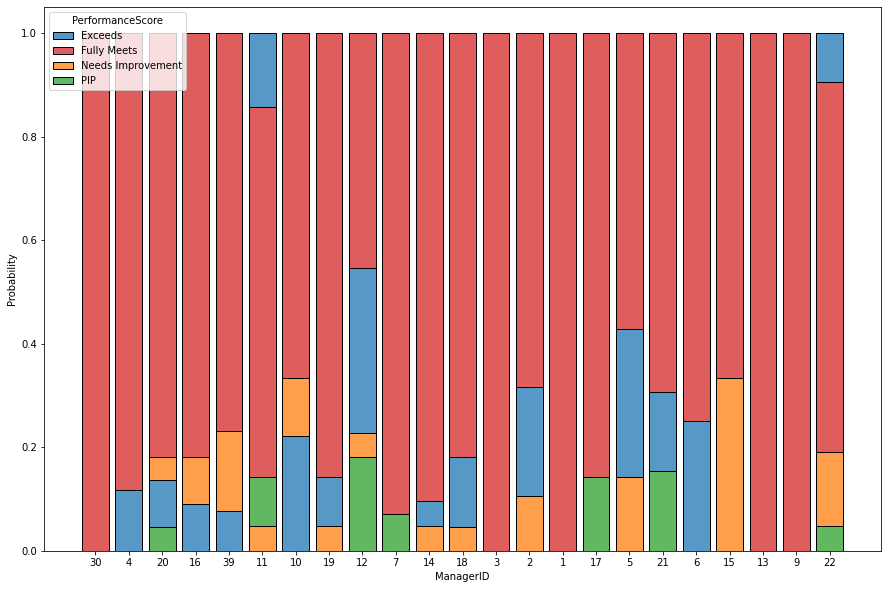

In [231]:
plt.figure(figsize=(15, 10))
for id in ids:
  sns.histplot(x='ManagerID', data=df_copy[df_copy['ManagerID']==id], hue='PerformanceScore', stat='probability', multiple='stack', shrink=0.8, palette=palette2)

Which managers supervise the most in the company ?

In [ ]:
ManagersIds = df_copy.groupby('ManagerID')['PerformanceScore'].count().sort_values(ascending=False).index

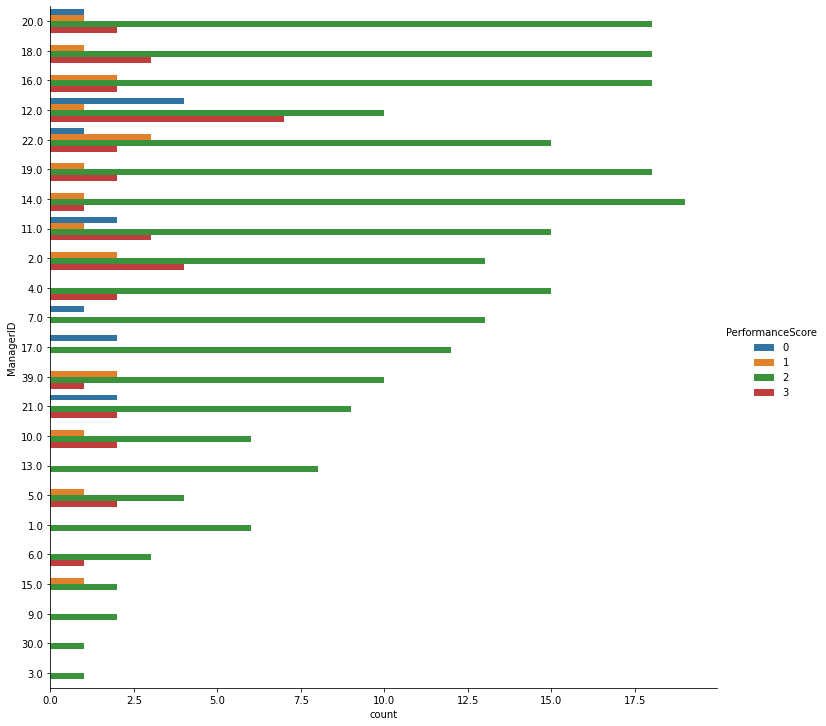

In [ ]:
sns.catplot(y='ManagerID', hue='PerformanceScore', kind='count', data=df_copy, order=ManagersIds, height=10, aspect=1)

Let's order them by decreasing number of bad results :

In [ ]:
# Ordering managers by number of bad results
ManagersIds = df_copy.groupby('PerformanceScore')['ManagerID'].value_counts().reset_index(name='count')['ManagerID'].unique()

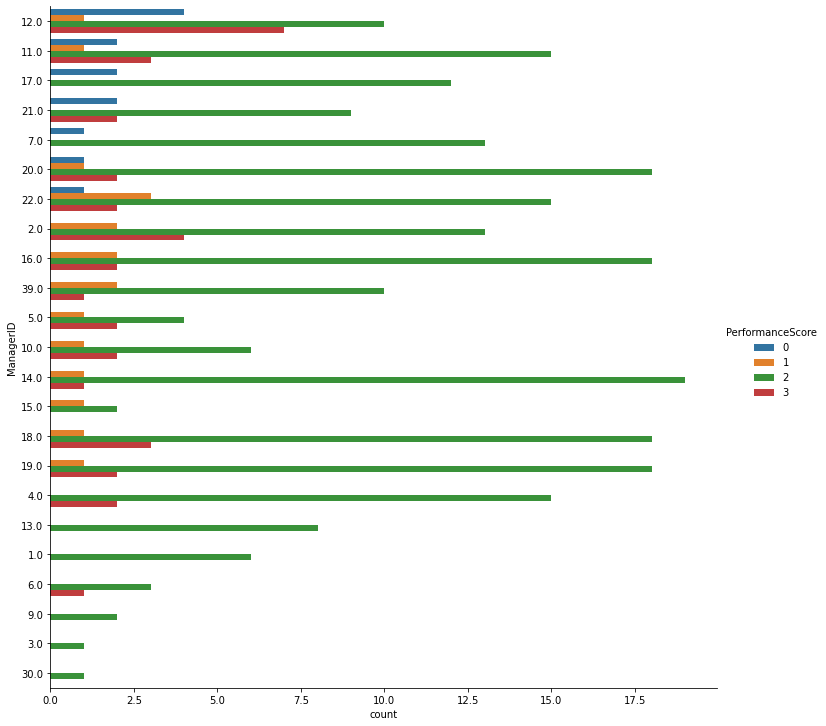

In [ ]:
sns.catplot(y='ManagerID', hue='PerformanceScore', kind='count', data=df_copy, order=ManagersIds, height=10, aspect=1)

It's also interesting to see the distribution of salaries between individuals having different performance scores and differents managers supervising them :

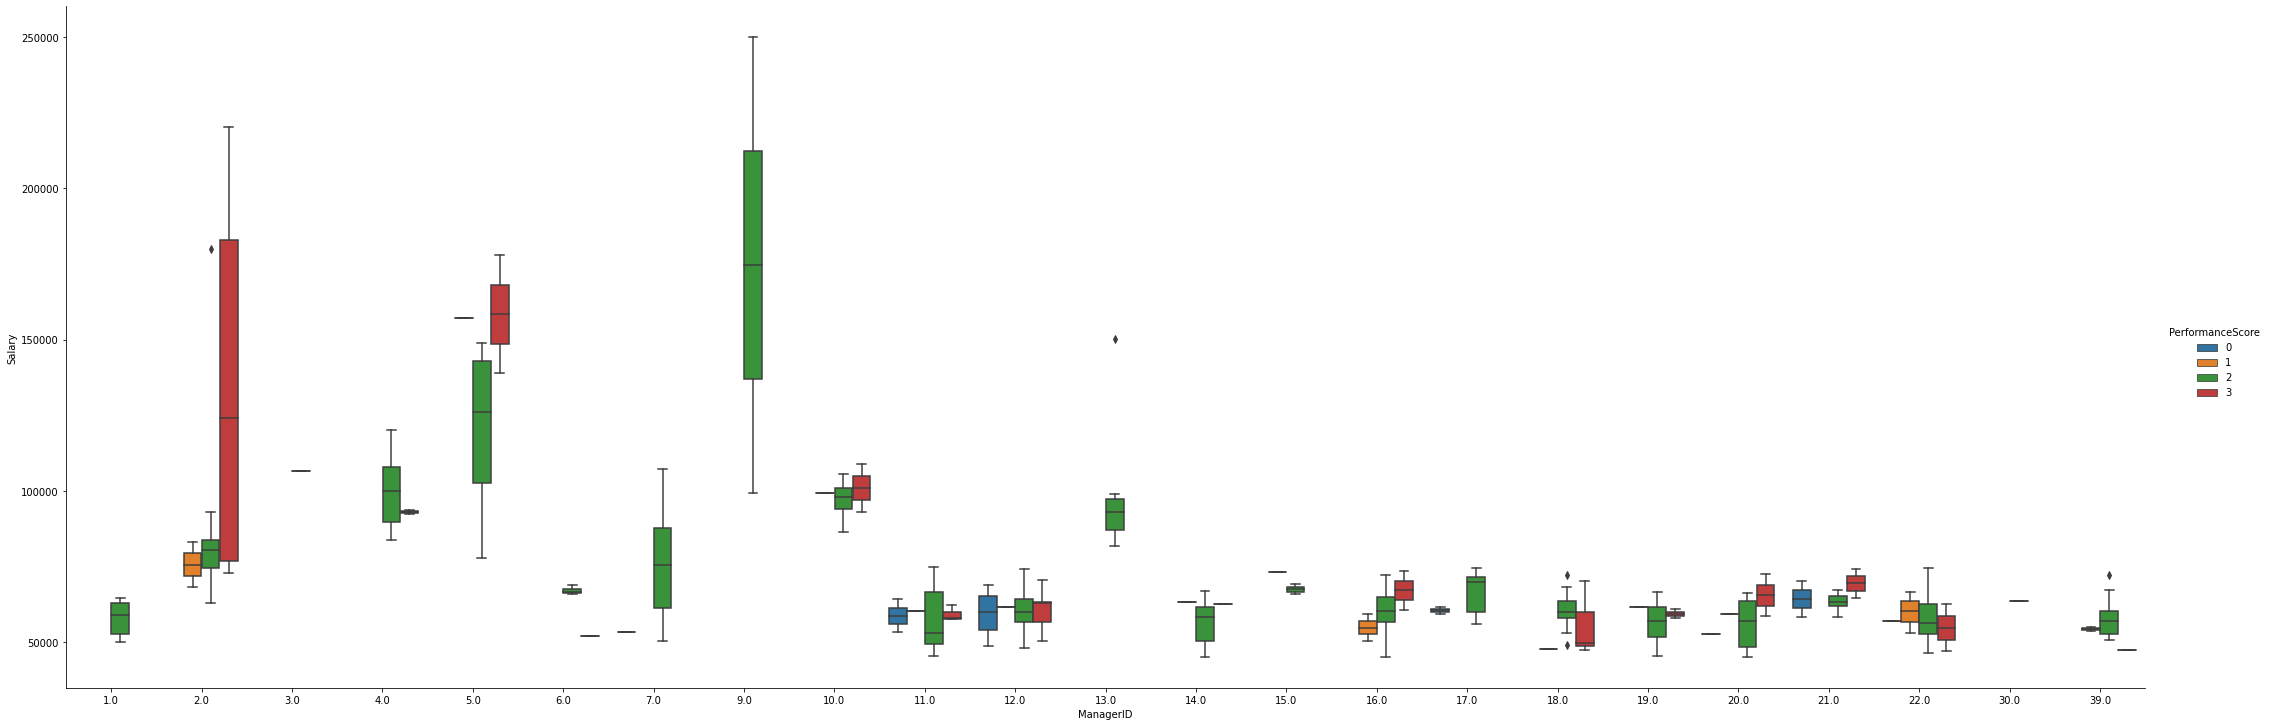

In [ ]:
µsns.catplot(x='ManagerID', y='Salary', hue='PerformanceScore', kind='box', data=df_copy, height=10, aspect=3)

In [ ]:
df_copy.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,3,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,2,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,2,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,2,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,2,5.00,4,0,2/1/2016,0,2


### *What is the overall diversity profile of the organization ?*

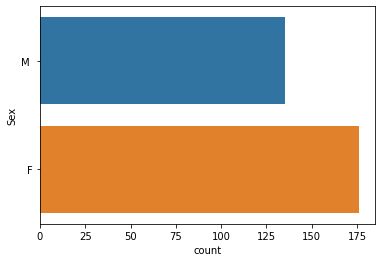

In [142]:
sns.countplot(y=df['Sex'])

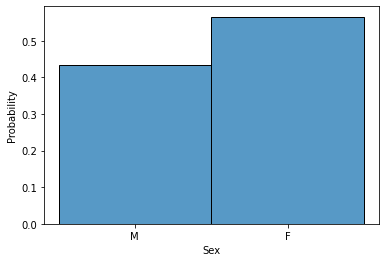

In [97]:
sns.histplot(x='Sex', data=df, stat='probability')

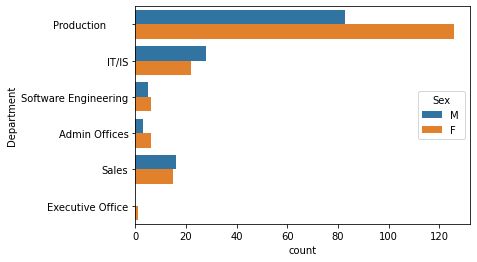

In [143]:
sns.countplot(y=df['Department'], hue=df['Sex'])

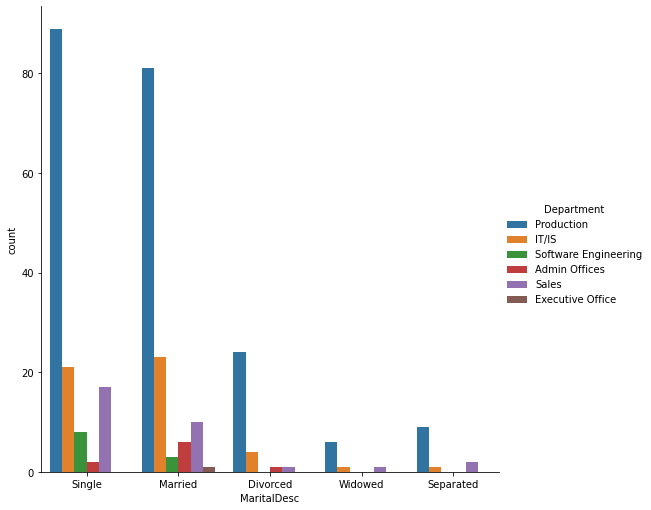

In [148]:
sns.catplot(x='MaritalDesc', hue='Department', data=df, kind="count",height=7, aspect=1)

In [ ]:
races = df.groupby('RaceDesc')['EmpID'].count().sort_values(ascending=False).index
df.groupby('RaceDesc')['EmpID'].count().sort_values(ascending=False)

RaceDesc
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: EmpID, dtype: int64

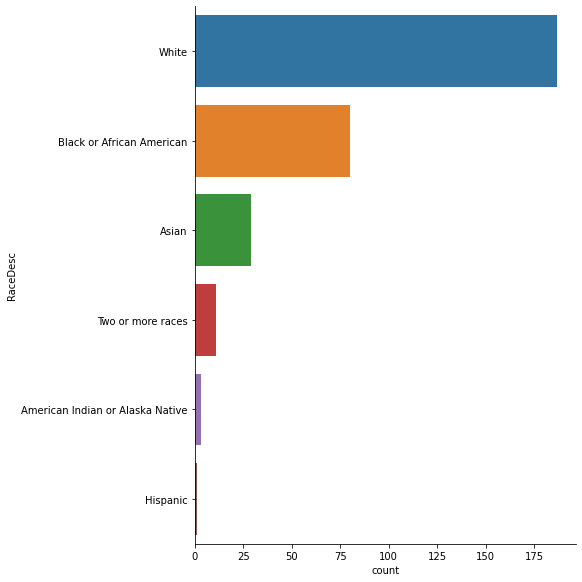

In [ ]:
sns.catplot(y='RaceDesc', data=df, kind='count', order=races,height=8, aspect=1)

In [105]:
df['Sex'].unique()

array(['M ', 'F'], dtype=object)

In [106]:
palette3 ={"M ": "C0", "F": "C1"}
races = ['White', 'Black or African American', 'Two or more races', 'Asian', 'Hispanic', 'American Indian or Alaska Native']
palette4 ={'White':"C0", 'Black or African American':"C1", 'Two or more races':"C2", 'Asian':"C3", 'Hispanic':"C4", 'American Indian or Alaska Native':"C5"}

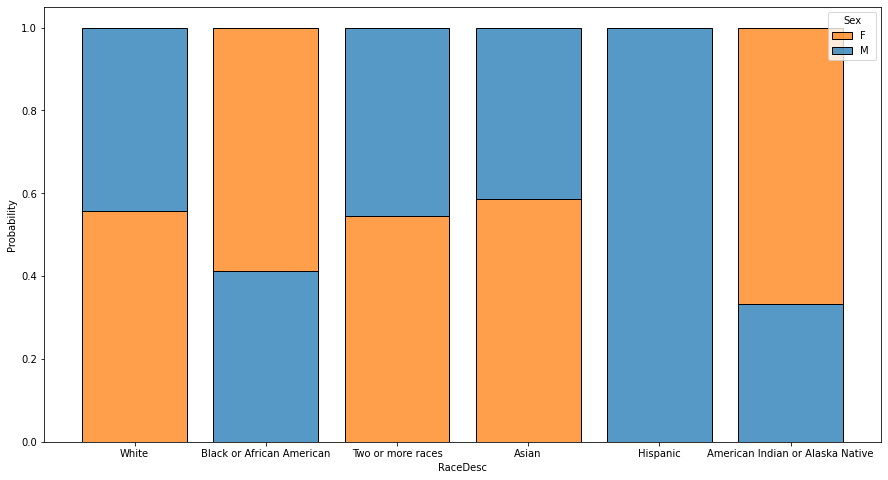

In [104]:
plt.figure(figsize=(15, 8))
for r in races:
  sns.histplot(x='RaceDesc', hue="Sex", multiple="stack", data=df[df['RaceDesc']==r], palette=palette3, stat='probability', shrink=.8)

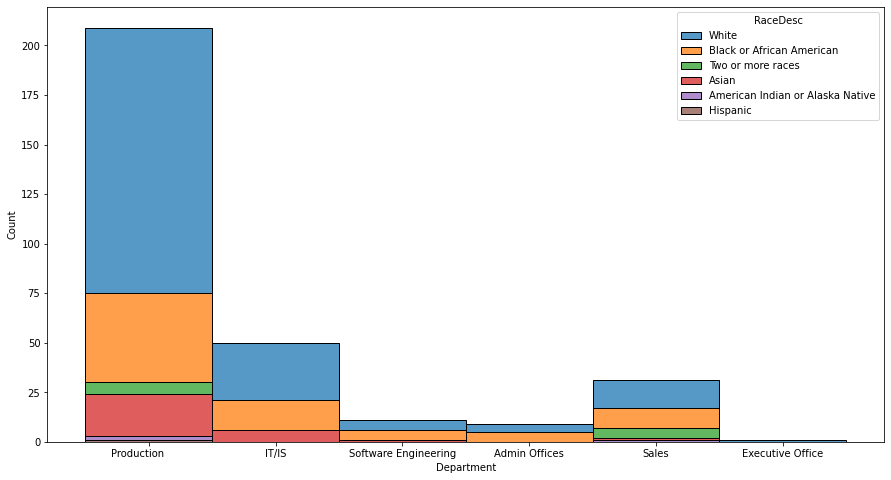

In [112]:
plt.figure(figsize=(15, 8))
sns.histplot(x='Department', hue='RaceDesc', multiple='stack', data=df)

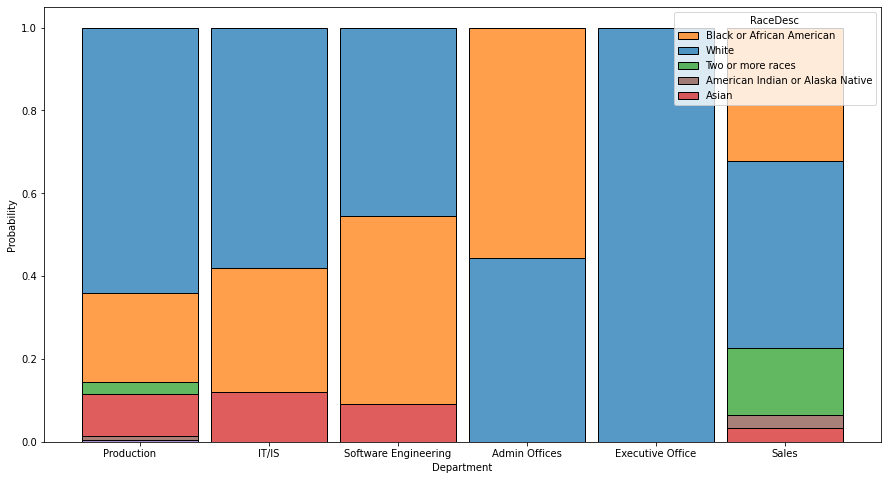

In [119]:
plt.figure(figsize=(15, 8))
for d in dps:
  sns.histplot(x='Department', hue='RaceDesc', palette=palette4, stat='probability', multiple='stack', shrink=0.9, data=df[df['Department']==d])

### *What are our best recruiting sources if we want to ensure a diverse organization ?*

In [113]:
df['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

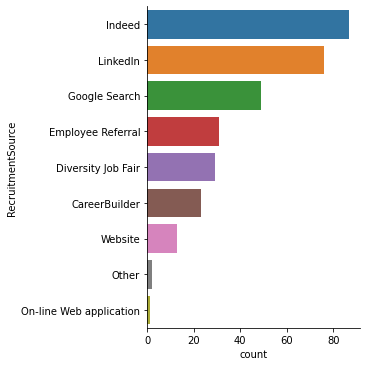

In [118]:
sns.catplot(y='RecruitmentSource', kind='count', order=df.groupby('RecruitmentSource')['EmpID'].count().sort_values(ascending=False).index, data=df)

In [125]:
sources = ['Other', 'LinkedIn', 'Google Search', 'Employee Referral','Diversity Job Fair', 'On-line Web application', 'CareerBuilder', 'Website', 'Indeed']

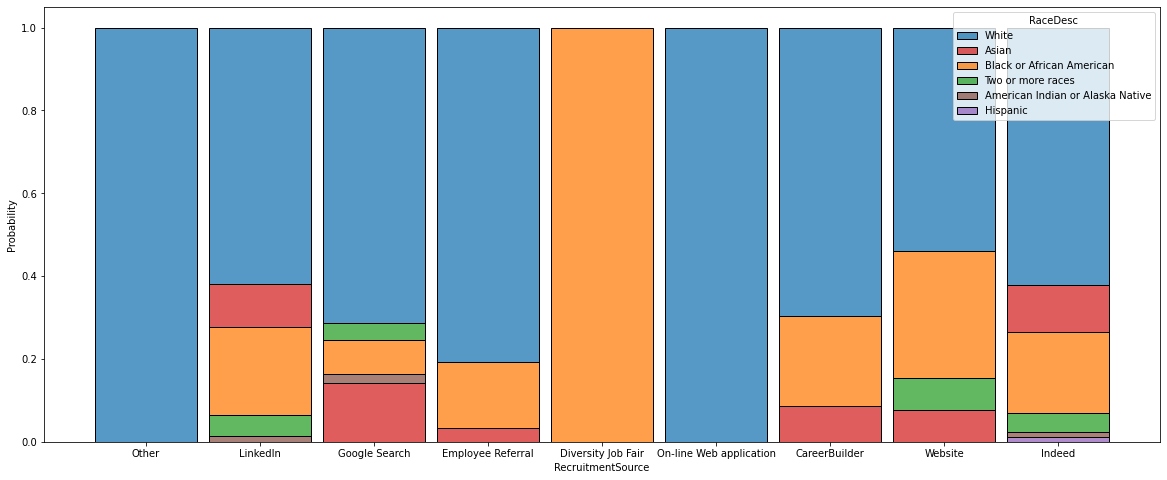

In [126]:
plt.figure(figsize=(20, 8))
for s in sources:
  sns.histplot(x='RecruitmentSource', hue='RaceDesc', data=df[df['RecruitmentSource']==s], stat='probability', palette=palette4,shrink=0.9, multiple='stack')

### *Are there areas of the company where pay is not equitable ?*

First, let's have a quick view on the distribution of salaries in the company. We can plot it by count :

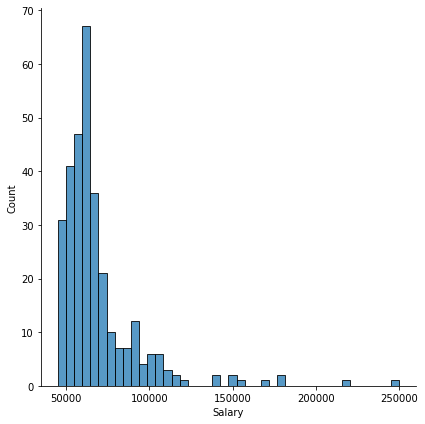

In [150]:
sns.displot(x=df['Salary'], height=6, aspect=1)

Or by density :

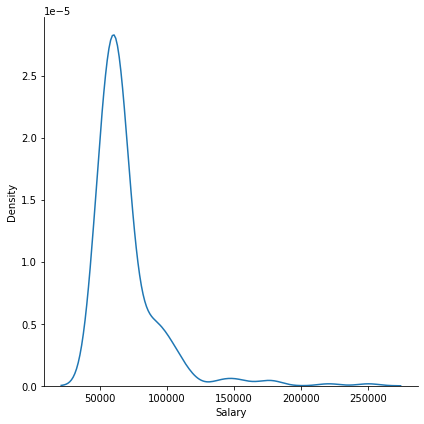

In [233]:
sns.displot(x=df['Salary'], kind='kde', height=6, aspect=1)

Box plots give us informations about quartiles (Q1, Q2 or median, Q3) and outliers :

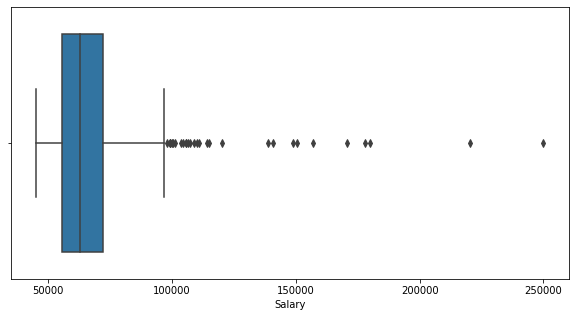

In [151]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Salary'])

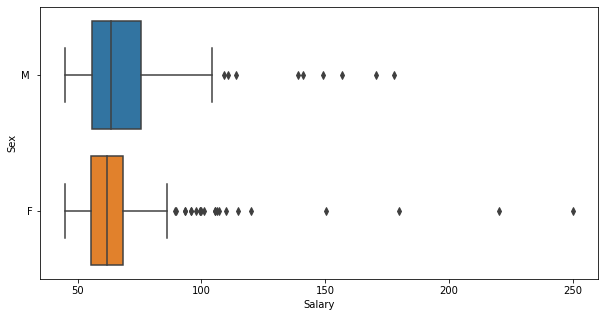

In [132]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Sex'], x=df['Salary']/1000)

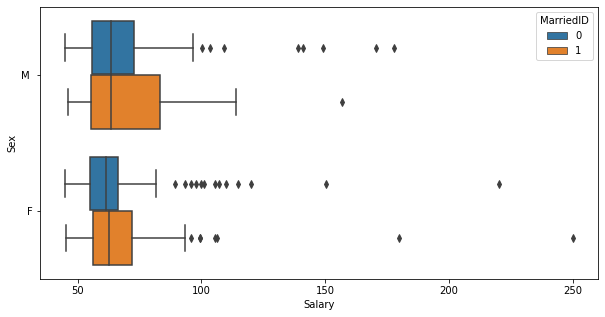

In [134]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Sex'], x=df['Salary']/1000, hue=df['MarriedID'])

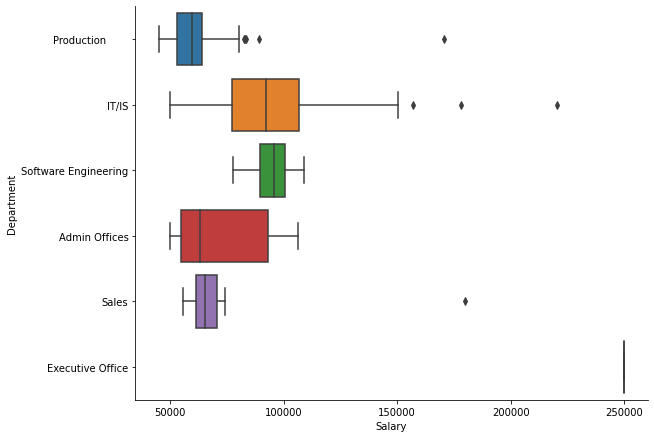

In [141]:
sns.catplot(y='Department', x='Salary', data=df, kind="box", height = 6, aspect = 1.5)

Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution :



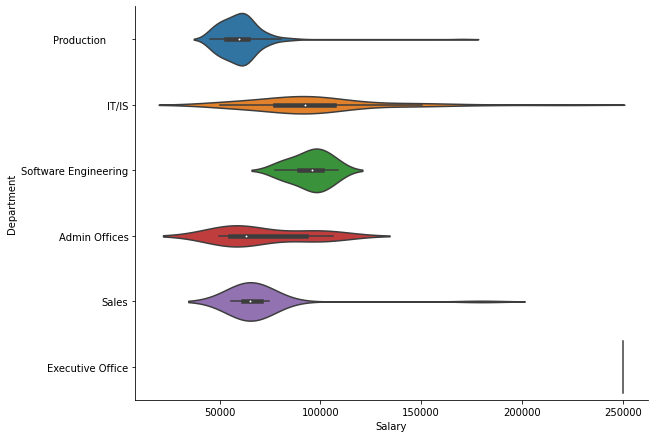

In [153]:
sns.catplot(y='Department', x='Salary', data=df, kind="violin", height = 6, aspect = 1.5)

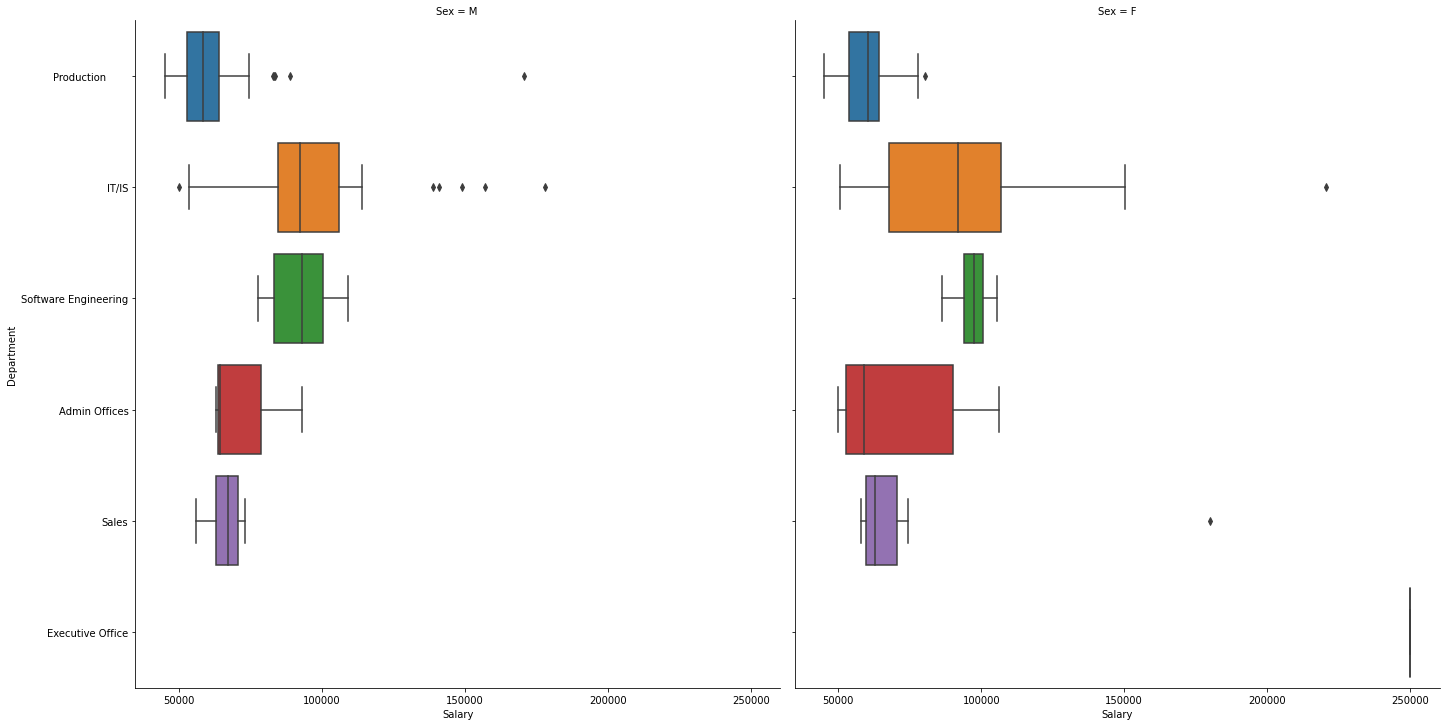

In [137]:
sns.catplot(y='Department', x='Salary', col='Sex', data=df, kind="box", height = 10, aspect = 1)

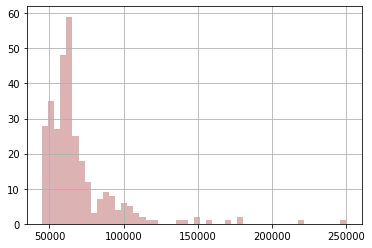

In [ ]:
df['Salary'].hist(bins=50,color='darkred',alpha=0.3)

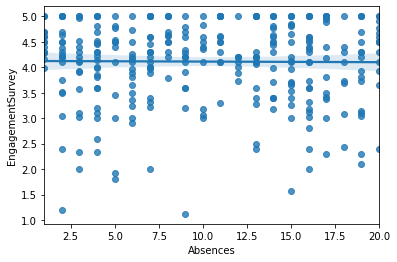

In [ ]:
sns.regplot(x=df['Absences'], y=df['EngagementSurvey'], x_estimator=np.mean)

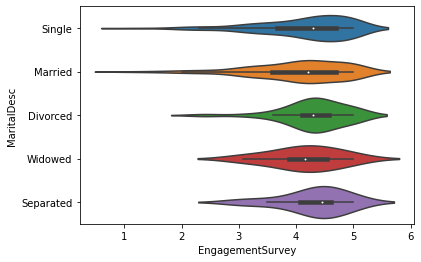

In [157]:
sns.violinplot(y="MaritalDesc", x="EngagementSurvey", data=df)